In [1]:
import scanpy as sc
import anndata as ann
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import cm, colors
import seaborn as sb

import os

# Define the path to the directory you want to change to
new_directory = '/afs/crc.nd.edu/user/e/eaboelno/sysVI_analysis/MM_sysVI/DEG_analysis/Microglia_sep'

# Use os.chdir() to change the working directory
os.chdir(new_directory)

In [2]:
save_dir = '/afs/crc.nd.edu/user/e/eaboelno/sysVI_analysis/MM_sysVI/DEG_analysis/Microglia_sep'

# Set up DEG lists

In [3]:
LPC_demyel_2 = pd.read_csv('./files/LPC_demyel_Mg_A_v_BAMs_voom_wqw_NEW.csv', index_col=None)
LPC_demyel_2.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
LPC_demyel_2.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
LPC_demyel_2.shape

(9436, 7)

In [4]:
LPC_demyel = pd.read_csv('./files/LPC_demyel_Mg_A_v_trt_voom_wqw_NEW.csv', index_col=None)
LPC_demyel.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
LPC_demyel.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
LPC_demyel.shape

(10659, 7)

In [5]:
LPC_remyel = pd.read_csv('./files/LPC_remyel_MG_DAMs_voom_wqw.csv', index_col=None)
LPC_remyel.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
LPC_remyel.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
LPC_remyel.shape

(10358, 7)

In [6]:
Cupr_demyel = pd.read_csv('./files/Cupr_demyel_Mg_A_v_trt_voom_wqw_NEW.csv', index_col=None)
Cupr_demyel.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
Cupr_demyel.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
Cupr_demyel.shape

(10148, 7)

In [7]:
Cupr_remyel = pd.read_csv('./files/Cupr_remyel_MG_DAM_voom_wqw.csv', index_col=None)
Cupr_remyel.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
Cupr_remyel.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
Cupr_remyel.shape

(9300, 7)

In [8]:
# Filter for upregulated genes
LPC_demyel_2_up = LPC_demyel_2[(LPC_demyel_2.Padj < 0.05) & (LPC_demyel_2.logFC >= 1)]
print(LPC_demyel_2_up.shape)

# Filter for downregulated genes
LPC_demyel_2_down = LPC_demyel_2[(LPC_demyel_2.Padj < 0.05) & (LPC_demyel_2.logFC <= -1)]
print(LPC_demyel_2_down.shape)

(1222, 7)
(2877, 7)


In [9]:
# Filter for upregulated genes
LPC_de_up = LPC_demyel[(LPC_demyel.Padj < 0.05) & (LPC_demyel.logFC >= 1)]
print(LPC_de_up.shape)

# Filter for downregulated genes
LPC_de_down = LPC_demyel[(LPC_demyel.Padj < 0.05) & (LPC_demyel.logFC <= -1)]
print(LPC_de_down.shape)

(914, 7)
(2241, 7)


In [10]:
# Filter for upregulated genes
LPC_re_up = LPC_remyel[(LPC_remyel.Padj < 0.05) & (LPC_remyel.logFC >= 1)]
print(LPC_re_up.shape)

# Filter for downregulated genes
LPC_re_down = LPC_remyel[(LPC_remyel.Padj < 0.05) & (LPC_remyel.logFC <= -1)]
print(LPC_re_down.shape)

(531, 7)
(1908, 7)


In [11]:
# Filter for upregulated genes
Cupr_de_up = Cupr_demyel[(Cupr_demyel.Padj < 0.05) & (Cupr_demyel.logFC >= 1)]
print(Cupr_de_up.shape)

# Filter for downregulated genes
Cupr_de_down = Cupr_demyel[(Cupr_demyel.Padj < 0.05) & (Cupr_demyel.logFC <= -1)]
print(Cupr_de_down.shape)

(738, 7)
(2463, 7)


In [12]:
# Filter for upregulated genes
Cupr_re_up = Cupr_remyel[(Cupr_remyel.Padj < 0.05) & (Cupr_remyel.logFC >= 1)]
print(Cupr_re_up.shape)

# Filter for downregulated genes
Cupr_re_down = Cupr_remyel[(Cupr_remyel.Padj < 0.05) & (Cupr_remyel.logFC <= -1)]
print(Cupr_re_down.shape)

(425, 7)
(1076, 7)


## 1.5X fold change

In [13]:
# Filter for upregulated genes
LPC_demyel_2_up = LPC_demyel_2[(LPC_demyel_2.Padj < 0.05) & (LPC_demyel_2.logFC >= 0.585)]
print(LPC_demyel_2_up.shape)

# Filter for downregulated genes
LPC_demyel_2_down = LPC_demyel_2[(LPC_demyel_2.Padj < 0.05) & (LPC_demyel_2.logFC <= -0.585)]
print(LPC_demyel_2_down.shape)

(1446, 7)
(3677, 7)


In [14]:
# Filter for upregulated genes
LPC_de_up = LPC_demyel[(LPC_demyel.Padj < 0.05) & (LPC_demyel.logFC >= 0.585)]
print(LPC_de_up.shape)

# Filter for downregulated genes
LPC_de_down = LPC_demyel[(LPC_demyel.Padj < 0.05) & (LPC_demyel.logFC <= -0.585)]
print(LPC_de_down.shape)

(1083, 7)
(2903, 7)


In [15]:
# Filter for upregulated genes
LPC_re_up = LPC_remyel[(LPC_remyel.Padj < 0.05) & (LPC_remyel.logFC >= 0.585)]
print(LPC_re_up.shape)

# Filter for downregulated genes
LPC_re_down = LPC_remyel[(LPC_remyel.Padj < 0.05) & (LPC_remyel.logFC <= -0.585)]
print(LPC_re_down.shape)

(728, 7)
(2564, 7)


In [16]:
# Filter for upregulated genes
Cupr_de_up = Cupr_demyel[(Cupr_demyel.Padj < 0.05) & (Cupr_demyel.logFC >= 0.585)]
print(Cupr_de_up.shape)

# Filter for downregulated genes
Cupr_de_down = Cupr_demyel[(Cupr_demyel.Padj < 0.05) & (Cupr_demyel.logFC <= -0.585)]
print(Cupr_de_down.shape)

(1107, 7)
(4365, 7)


In [17]:
# Filter for upregulated genes
Cupr_re_up = Cupr_remyel[(Cupr_remyel.Padj < 0.05) & (Cupr_remyel.logFC >= 0.585)]
print(Cupr_re_up.shape)

# Filter for downregulated genes
Cupr_re_down = Cupr_remyel[(Cupr_remyel.Padj < 0.05) & (Cupr_remyel.logFC <= -0.585)]
print(Cupr_re_down.shape)

(430, 7)
(1085, 7)


In [18]:
# Create gene lists from the dfs:
genes_LPC_de_BAMs_up = LPC_demyel_2_up['gene'].tolist()
genes_LPC_de_DAMs_up = LPC_de_up['gene'].tolist()
genes_LPC_re_DAMs_up = LPC_re_up['gene'].tolist()
genes_Cupr_de_DAMs_up = Cupr_de_up['gene'].tolist()
genes_Cupr_re_DAMs_up = Cupr_re_up['gene'].tolist()

In [19]:
# Create gene lists from the dfs:
genes_LPC_de_BAMs_down = LPC_demyel_2_down['gene'].tolist()
genes_LPC_de_DAMs_down = LPC_de_down['gene'].tolist()
genes_LPC_re_DAMs_down = LPC_re_down['gene'].tolist()
genes_Cupr_de_DAMs_down = Cupr_de_down['gene'].tolist()
genes_Cupr_re_DAMs_down = Cupr_re_down['gene'].tolist()

# Barchart

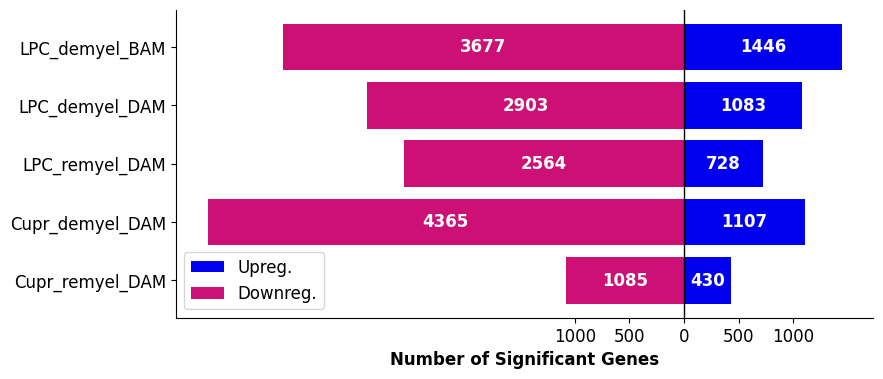

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Data
conditions = ["LPC_demyel_BAM", "LPC_demyel_DAM", "LPC_remyel_DAM", "Cupr_demyel_DAM", "Cupr_remyel_DAM"]
up_genes = np.array([1446, 1083, 728, 1107, 430])
down_genes = np.array([-3677, -2903, -2564, -4365, -1085])  # Negative for left alignment

# Reverse all data
conditions = conditions[::-1]
up_genes = up_genes[::-1]
down_genes = down_genes[::-1]

# Bar width (increased) and figure size (shorter height)
bar_width = 0.8
fig, ax = plt.subplots(figsize=(9, 4))  # Reduce height to save space

# Plot downregulated genes (left side, using negative values)
bars_down = ax.barh(conditions, down_genes, color='#CD1076', label="Downregulated Genes", height=bar_width)

# Plot upregulated genes (right side, starting at 0)
bars_up = ax.barh(conditions, up_genes, color='#0000EE', label="Upregulated Genes", height=bar_width)

# Add number labels inside the bars, except for Cupr_remyel_E (last condition)
for bar, value, condition in zip(bars_down, down_genes, conditions):
    if condition == "Cupr_remyel_E":
        ax.text(bar.get_x() + bar.get_width() - 20,  # Just outside the bar
                bar.get_y() + bar.get_height() / 2, 
                str(abs(value)), 
                ha='right', va='center', color='black', fontsize=12, fontweight='bold')
    else:
        ax.text(bar.get_x() + bar.get_width() / 2, 
                bar.get_y() + bar.get_height() / 2, 
                str(abs(value)), 
                ha='center', va='center', color='white', fontsize=12, fontweight='bold')

for bar, value, condition in zip(bars_up, up_genes, conditions):
    if condition == "Cupr_remyel_E":
        ax.text(bar.get_x() + bar.get_width() + 20,  # Just outside the bar
                bar.get_y() + bar.get_height() / 2, 
                str(value), 
                ha='left', va='center', color='black', fontsize=12, fontweight='bold')
    else:
        ax.text(bar.get_x() + bar.get_width() / 2, 
                bar.get_y() + bar.get_height() / 2, 
                str(value), 
                ha='center', va='center', color='white', fontsize=12, fontweight='bold')

# Formatting
ax.set_yticks(np.arange(len(conditions)))
ax.set_yticklabels(conditions, fontsize=12)
ax.set_xlabel("Number of Significant Genes", fontsize=12, fontweight='bold')

# Adjust x-axis to show only 500 and 1000
ax.set_xticks([-1000, -500, 0, 500, 1000])
ax.set_xticklabels([1000, 500, 0, 500, 1000], fontsize=12)

ax.axvline(0, color='black', linewidth=1)  # Zero line

# Remove right and top spines for a cleaner look
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Properly reorder the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend([handles[1], handles[0]], ["Upreg.", "Downreg."], loc="lower left", fontsize=12)

# Save the plot
plt.savefig("DEG_bar_chart_MG.png", dpi=300, bbox_inches='tight')  # Save with high quality

# Show plot
plt.show()

# SUBSET TO ONLY SHARED GENES TESTED IN ALL CONDITIONS

In [26]:
## IMPORTANT FILTER FOR GENES TESTING IN ALL CONDITIONS

genes_all_conditions = set(LPC_demyel_2['gene']) & \
                       set(LPC_demyel['gene']) & \
                       set(LPC_remyel['gene']) & \
                       set(Cupr_demyel['gene']) & \
                       set(Cupr_remyel['gene'])

In [27]:
# Function to filter DE DataFrames to include only genes tested in all conditions
def filter_genes(df):
    return df[df['gene'].isin(genes_all_conditions)]

# Apply filtering to each DEG DataFrame
LPC_demyel_2_up = filter_genes(LPC_demyel_2_up)
LPC_de_up = filter_genes(LPC_de_up)
LPC_re_up = filter_genes(LPC_re_up)
Cupr_de_up = filter_genes(Cupr_de_up)
Cupr_re_up = filter_genes(Cupr_re_up)

print(LPC_demyel_2_up.shape)
print(LPC_de_up.shape)
print(LPC_re_up.shape)
print(Cupr_de_up.shape)
print(Cupr_re_up.shape)

(1222, 7)
(960, 7)
(682, 7)
(852, 7)
(360, 7)


In [28]:
# Function to filter DE DataFrames to include only genes tested in all conditions
def filter_genes(df):
    return df[df['gene'].isin(genes_all_conditions)]

# Apply filtering to each DEG DataFrame
LPC_demyel_2_down = filter_genes(LPC_demyel_2_down)
LPC_de_down = filter_genes(LPC_de_down)
LPC_re_down = filter_genes(LPC_re_down)
Cupr_de_down = filter_genes(Cupr_de_down)
Cupr_re_down = filter_genes(Cupr_re_down)

print(LPC_demyel_2_down.shape)
print(LPC_de_down.shape)
print(LPC_re_down.shape)
print(Cupr_de_down.shape)
print(Cupr_re_down.shape)

(3386, 7)
(2329, 7)
(2130, 7)
(3488, 7)
(930, 7)


# Upset plots

In [29]:
from upsetplot import plot
from upsetplot import from_contents
from upsetplot import UpSet

In [30]:
# Create gene lists from the dfs:
genes_LPC_demyel_2_up = LPC_demyel_2_up['gene'].tolist()
genes_LPC_de_up = LPC_de_up['gene'].tolist()
genes_LPC_re_up = LPC_re_up['gene'].tolist()
genes_Cupr_de_up = Cupr_de_up['gene'].tolist()
genes_Cupr_re_up = Cupr_re_up['gene'].tolist()

# Create DataFrames for each gene list
# Define the function to create a DataFrame
def create_gene_df(genes_list, column_name):
    return pd.DataFrame(genes_list, columns=[column_name])

# Create DataFrames for each gene list
LPC_demyel_2_up_df = create_gene_df(genes_LPC_demyel_2_up, 'OPC_de_up')
LPC_de_up_df = create_gene_df(genes_LPC_de_up, 'LPC_de_up')
LPC_re_up_df = create_gene_df(genes_LPC_re_up, 'LPC_re_up')
Cupr_de_up_df = create_gene_df(genes_Cupr_de_up, 'Cupr_de_up')
Cupr_re_up_df = create_gene_df(genes_Cupr_re_up, 'Cupr_re_up')

In [31]:
# Create DataFrames for each gene list using the new gene lists
LPC_de2_up_df = pd.DataFrame({'LPC_de2_up': True, 'Name': genes_LPC_demyel_2_up})
LPC_de_up_df = pd.DataFrame({'LPC_de_up': True, 'Name': genes_LPC_de_up})
LPC_re_up_df = pd.DataFrame({'LPC_re_up': True, 'Name': genes_LPC_re_up})
Cupr_de_up_df = pd.DataFrame({'Cupr_de_up': True, 'Name': genes_Cupr_de_up})
Cupr_re_up_df = pd.DataFrame({'Cupr_re_up': True, 'Name': genes_Cupr_re_up})

In [32]:
# Merge all the DataFrames hierarchically
up_df = LPC_de2_up_df.merge(
    LPC_de_up_df.merge(
        LPC_re_up_df.merge(
            Cupr_de_up_df.merge(
                Cupr_re_up_df, on='Name', how='outer'
            ), on='Name', how='outer'
        ), on='Name', how='outer'
    ), on='Name', how='outer'
)

# Replace NaN with False
up_df = up_df.fillna(False)

# Set index for the data frame
up_df_plot = up_df.set_index([
    'LPC_de2_up', 'LPC_de_up', 'LPC_re_up', 'Cupr_de_up', 'Cupr_re_up'
])

# Print the merged DataFrame
print("Upregulated genes DataFrame:")
print(up_df_plot)

Upregulated genes DataFrame:
                                                               Name
LPC_de2_up LPC_de_up LPC_re_up Cupr_de_up Cupr_re_up               
True       True      False     True       False       0610012G03Rik
           False     False     True       False       1110008P14Rik
                               False      False       1190007I07Rik
False      True      True      True       True        1700003F12Rik
           False     False     True       False       1700037H04Rik
...                                                             ...
           True      False     False      False             Zfyve21
           False     False     True       False                Zhx2
True       True      False     False      False               Zmat5
           False     False     False      False              Znhit1
False      True      False     False      False              Znhit3

[1766 rows x 1 columns]


/tmp/1596331.1.gpu/ipykernel_1569649/3215787398.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  up_df = up_df.fillna(False)


In [33]:
# Dictionary to map old index names to new index names
index_name_map = {
    'LPC_de2_up': 'LPC_demyel_BAMs',
    'LPC_de_up': 'LPC_demyel_DAMs',
    'LPC_re_up': 'LPC_remyel_DAMs',
    'Cupr_de_up': 'Cupr_demyel_DAMs',
    'Cupr_re_up': 'Cupr_remyel_DAMs'
}

# Rename the index levels using the dictionary
up_df_plot.index = up_df_plot.index.rename(index_name_map)

print("Updated Upregulated genes DataFrame:")
print(up_df_plot)

Updated Upregulated genes DataFrame:
                                                                                            Name
LPC_demyel_BAMs LPC_demyel_DAMs LPC_remyel_DAMs Cupr_demyel_DAMs Cupr_remyel_DAMs               
True            True            False           True             False             0610012G03Rik
                False           False           True             False             1110008P14Rik
                                                False            False             1190007I07Rik
False           True            True            True             True              1700003F12Rik
                False           False           True             False             1700037H04Rik
...                                                                                          ...
                True            False           False            False                   Zfyve21
                False           False           True             False                    

/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/edgeR/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/edgeR/lib/python3.11/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the inte

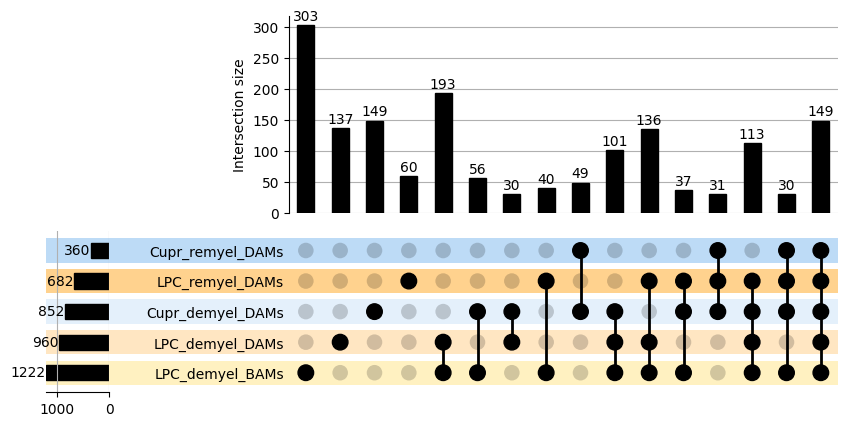

In [34]:
# Create UpSet plot
#upset = UpSet(up_df_plot, subset_size='count', show_counts=True, facecolor="black", min_degree=2, min_subset_size=15)
upset = UpSet(up_df_plot, subset_size='count', show_counts=True, facecolor="black", min_degree=1, min_subset_size=30)

# Style the subsets
upset.style_categories(
    'LPC_demyel_BAMs',
    shading_facecolor="#fff1c1",
)

# Style the subsets
upset.style_categories(
    'LPC_demyel_DAMs',
    shading_facecolor="#ffe6c2",
)

# Style the subsets
upset.style_categories(
    'LPC_remyel_DAMs',
    shading_facecolor="#ffd28e",
)

# Style the subsets
upset.style_categories(
    'Cupr_demyel_DAMs',
    shading_facecolor="#e4f0fb",
)

# Style the subsets
upset.style_categories(
    'Cupr_remyel_DAMs',
    shading_facecolor="#bddbf6",
)

# Plot the UpSet plot
upset.plot()
plt.suptitle("")

# Save the plot as PDF
#plt.savefig('./figures/upset_up_ALL_n30.png', dpi=300, bbox_inches='tight', facecolor='none')

plt.show()

In [35]:
# Create gene lists from the dfs:
genes_LPC_demyel_2_down = LPC_demyel_2_down['gene'].tolist()
genes_LPC_de_down = LPC_de_down['gene'].tolist()
genes_LPC_re_down = LPC_re_down['gene'].tolist()
genes_Cupr_de_down = Cupr_de_down['gene'].tolist()
genes_Cupr_re_down = Cupr_re_down['gene'].tolist()

# Create DataFrames for each gene list
LPC_demyel_2_down_df = create_gene_df(genes_LPC_demyel_2_down, 'LPC_demyel_2_down')
LPC_de_down_df = create_gene_df(genes_LPC_de_down, 'LPC_de_down')
LPC_re_down_df = create_gene_df(genes_LPC_re_down, 'LPC_re_down')
Cupr_de_down_df = create_gene_df(genes_Cupr_de_down, 'Cupr_de_down')
Cupr_re_down_df = create_gene_df(genes_Cupr_re_down, 'Cupr_re_down')

# Create DataFrames for each gene list using the new gene lists
LPC_demyel_2_down_df = pd.DataFrame({'LPC_demyel_2_down': True, 'Name': genes_LPC_demyel_2_down})
LPC_de_down_df = pd.DataFrame({'LPC_de_down': True, 'Name': genes_LPC_de_down})
LPC_re_down_df = pd.DataFrame({'LPC_re_down': True, 'Name': genes_LPC_re_down})
Cupr_de_down_df = pd.DataFrame({'Cupr_de_down': True, 'Name': genes_Cupr_de_down})
Cupr_re_down_df = pd.DataFrame({'Cupr_re_down': True, 'Name': genes_Cupr_re_down})

In [36]:
# Merge all the DataFrames hierarchically
down_df = LPC_demyel_2_down_df.merge(
    LPC_de_down_df.merge(
        LPC_re_down_df.merge(
            Cupr_de_down_df.merge(
                Cupr_re_down_df, on='Name', how='outer'
            ), on='Name', how='outer'
        ), on='Name', how='outer'
    ), on='Name', how='outer'
)

# Replace NaN with False
down_df = down_df.fillna(False)

# Set index for the data frame
down_df_plot = down_df.set_index([
    'LPC_demyel_2_down', 'LPC_de_down', 'LPC_re_down', 'Cupr_de_down', 'Cupr_re_down'
])

# Print the merged DataFrame
print("Downregulated genes DataFrame:")
print(down_df_plot)

Downregulated genes DataFrame:
                                                                              Name
LPC_demyel_2_down LPC_de_down LPC_re_down Cupr_de_down Cupr_re_down               
False             True        True        False        False         0610010F05Rik
                  False       False       True         False         0610010K14Rik
True              True        False       False        False         0610030E20Rik
                              True        True         True          0610040J01Rik
                                                       False         1110002L01Rik
...                                                                            ...
                              False       False        False                   Zyx
False             False       False       True         False                 Zzef1
True              True        True        True         False                  Zzz3
                                                       F

/tmp/1596331.1.gpu/ipykernel_1569649/665469858.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  down_df = down_df.fillna(False)


In [37]:
# Dictionary to map old index names to new index names
index_name_map = {
    'LPC_demyel_2_down': 'LPC_demyel_BAMs',
    'LPC_de_down': 'LPC_demyel_DAMs',
    'LPC_re_down': 'LPC_remyel_DAMs',
    'Cupr_de_down': 'Cupr_demyel_DAMs',
    'Cupr_re_down': 'Cupr_remyel_DAMs'
}

# Rename the index levels using the dictionary
down_df_plot.index = down_df_plot.index.rename(index_name_map)

print("Updated Upregulated genes DataFrame:")
print(down_df_plot)

Updated Upregulated genes DataFrame:
                                                                                            Name
LPC_demyel_BAMs LPC_demyel_DAMs LPC_remyel_DAMs Cupr_demyel_DAMs Cupr_remyel_DAMs               
False           True            True            False            False             0610010F05Rik
                False           False           True             False             0610010K14Rik
True            True            False           False            False             0610030E20Rik
                                True            True             True              0610040J01Rik
                                                                 False             1110002L01Rik
...                                                                                          ...
                                False           False            False                       Zyx
False           False           False           True             False                    

/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/edgeR/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/edgeR/lib/python3.11/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the inte

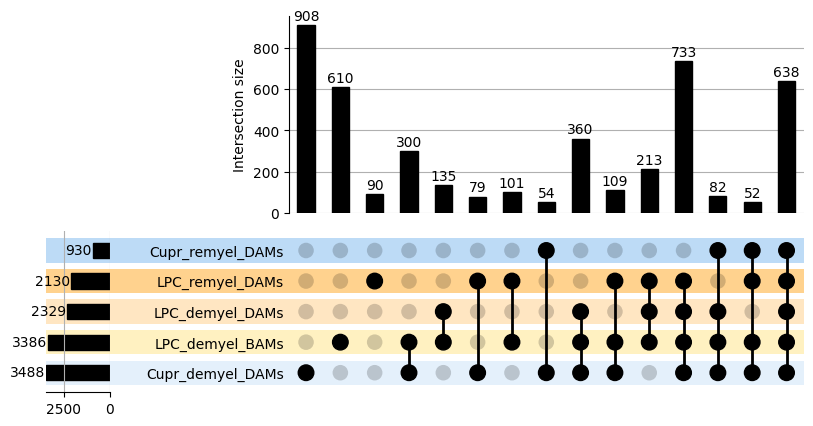

In [38]:
# Create UpSet plot
upset = UpSet(down_df_plot, subset_size='count', show_counts=True, facecolor="black",
              min_degree=1, min_subset_size=50)

# Style the subsets
upset.style_categories(
    'LPC_demyel_BAMs',
    shading_facecolor="#fff1c1",
)

# Style the subsets
upset.style_categories(
    'LPC_demyel_DAMs',
    shading_facecolor="#ffe6c2",
)

# Style the subsets
upset.style_categories(
    'LPC_remyel_DAMs',
    shading_facecolor="#ffd28e",
)

# Style the subsets
upset.style_categories(
    'Cupr_demyel_DAMs',
    shading_facecolor="#e4f0fb",
)

# Style the subsets
upset.style_categories(
    'Cupr_remyel_DAMs',
    shading_facecolor="#bddbf6",
)

# Plot the UpSet plot
upset.plot()
plt.suptitle("")

# Save the plot as PDF
#plt.savefig('./figures/upset_down_ALL_n50.png', dpi=300, bbox_inches='tight', facecolor='none')

plt.show()

# Set up gene lists- overlapping only

In [23]:
# Create gene lists from the dfs:
genes_LPC_de_BAMs_up = LPC_demyel_2_up['gene'].tolist()
genes_LPC_de_DAMs_up = LPC_de_up['gene'].tolist()
genes_LPC_re_DAMs_up = LPC_re_up['gene'].tolist()
genes_Cupr_de_DAMs_up = Cupr_de_up['gene'].tolist()
genes_Cupr_re_DAMs_up = Cupr_re_up['gene'].tolist()

In [24]:
# Create gene lists from the dfs:
genes_LPC_de_BAMs_down = LPC_demyel_2_down['gene'].tolist()
genes_LPC_de_DAMs_down = LPC_de_down['gene'].tolist()
genes_LPC_re_DAMs_down = LPC_re_down['gene'].tolist()
genes_Cupr_de_DAMs_down = Cupr_de_down['gene'].tolist()
genes_Cupr_re_DAMs_down = Cupr_re_down['gene'].tolist()

In [25]:
set_LPC_de_BAMs_up = set(genes_LPC_de_BAMs_up)
set_LPC_de_DAMs_up = set(genes_LPC_de_DAMs_up)
set_LPC_re_DAMs_up = set(genes_LPC_re_DAMs_up)
set_Cupr_de_DAMs_up = set(genes_Cupr_de_DAMs_up)
set_Cupr_re_DAMs_up = set(genes_Cupr_re_DAMs_up)
set_LPC_de_BAMs_down = set(genes_LPC_de_BAMs_down)
set_LPC_de_DAMs_down = set(genes_LPC_de_DAMs_down)
set_LPC_re_DAMs_down = set(genes_LPC_re_DAMs_down)
set_Cupr_de_DAMs_down = set(genes_Cupr_de_DAMs_down)
set_Cupr_re_DAMs_down = set(genes_Cupr_re_DAMs_down)

print(len(set_Cupr_re_DAMs_down))

930


In [26]:
# Overlap of upregulated genes
overlap_up_all = set_LPC_de_BAMs_up & set_LPC_de_DAMs_up & set_LPC_re_DAMs_up & set_Cupr_de_DAMs_up & set_Cupr_re_DAMs_up
print("Number of overlapping upregulated genes:", len(overlap_up_all))
print("Overlapping upregulated genes:", overlap_up_all)

Number of overlapping upregulated genes: 149
Overlapping upregulated genes: {'Xylt1', 'Lipa', 'Adam33', 'Atp1a3', 'Igf1', 'Fabp3', 'Gpnmb', 'Cpd', 'Nceh1', 'Cd68', 'Bst2', 'Man2a1', 'Arhgap24', 'Lilrb4a', 'Lpl', 'Uap1l1', 'Rpl10a', 'Pkm', 'Gcnt2', 'Lmnb1', 'Gm13391', 'Rab7b', 'Capg', 'Fundc2', 'Cd52', 'Ahnak2', 'Pim1', 'Atox1', 'Akr1a1', 'Apoc2', 'Ms4a7', 'Colec12', 'Fxyd5', 'Trps1', 'Nme2', 'Mamdc2', 'Cstb', 'Fcer1g', 'Abca1', 'Coro1c', 'Mcub', 'Pld3', 'Psen2', 'Lyz2', 'Iqgap1', 'Cd72', 'Tpd52', 'Sash1', 'Myo1e', 'Cd300lf', 'Bcar3', 'Ptger4', 'Amdhd2', 'Got1', 'Ldha', 'Il3ra', 'Pgk1', 'Hspe1', 'Fabp5', 'Cyp4f18', 'Tmem106a', 'Fcgr4', 'Tpi1', 'B2m', 'Ddhd1', 'Rap2b', 'Txn1', 'Gpr137b', 'Rai14', 'Mfsd12', 'Plxnc1', 'Slc2a6', 'Mdfic', 'Plin2', 'Rtcb', 'Cd200r4', 'Apoc4', 'Ms4a6c', 'Anxa2', 'Rftn1', 'Cd44', 'Ctse', 'Dnase1l1', 'Gm38335', 'Anxa5', 'Gpi1', 'Prdx1', 'Gpr65', 'Ctsz', 'Gyg', 'Lgals3bp', 'Rnf149', 'Cd22', 'Bhlhe40', 'Rbms1', 'Ctsb', 'Dab2', 'Vat1', 'Lilr4b', 'Ezr', 'Myo5a', 'Hc

In [34]:
subset_df = LPC_demyel_2[LPC_demyel_2['gene'].isin(overlap_up_all)]
subset_df = subset_df.sort_values(by='logFC', ascending=False)
print(subset_df[:5])
sorted_genes = subset_df['gene'].tolist()  # Convert to list
print(", ".join(sorted_genes))  # Print as comma-separated values

        gene      logFC   AveExpr          t        Pvalue          Padj  \
1374    Spp1  13.604488  8.051441   7.091438  1.046171e-05  7.179393e-05   
277    Gpnmb  12.431175  8.109652  13.774847  6.810086e-09  2.304065e-07   
1941   Fabp5  12.000838  7.068572   5.870494  6.605019e-05  3.209318e-04   
1353  Lgals3  11.675251  6.993482   7.131681  9.878422e-06  6.884253e-05   
3853  Wfdc17   9.615664  5.152937   3.544077  3.841180e-03  9.404613e-03   

             B  
1374  3.580868  
277   8.633194  
1941  1.932867  
1353  3.535873  
3853 -1.698413  
Spp1, Gpnmb, Fabp5, Lgals3, Wfdc17, Ms4a7, Apoc2, Igf1, Vim, Apoe, Anxa2, Ahnak2, Bhlhe40, Sash1, Cyp4f18, Rab7b, Trps1, Cd300lf, Lyz2, Lilr4b, Plxnc1, Apoc1, Fam20c, Tmem205, Mdfic, Cybb, Mamdc2, Crip1, Plin2, Apoc4, Rai14, Il3ra, Fxyd5, Ddhd1, Cd200r4, Gas2l3, Fn1, Ezr, Vat1, Mmp12, Iqgap1, Ifi207, Adam8, Cd44, Xylt1, Adam33, Dram1, Sh3pxd2b, Dnase1l1, Bcar3, Gyg, Anxa5, Ms4a6c, Fabp3, Atp1a3, Txn1, Gm38335, Lilrb4a, Mcub, Gm13391, Axl

In [35]:
subset_df1 = LPC_demyel[LPC_demyel['gene'].isin(overlap_up_all)]
subset_df1 = subset_df1.sort_values(by='logFC', ascending=False)
print(subset_df1[:5])
#sorted_genes = subset_df1['gene'].tolist()  # Convert to list
#print(", ".join(sorted_genes))  # Print as comma-separated values

        gene     logFC   AveExpr         t    Pvalue      Padj         B
1143    Spp1  8.860651  5.917407  5.449827  0.000145  0.001352  1.239534
245     Igf1  8.825738  6.014955  8.892892  0.000001  0.000052  5.075509
741   Lgals3  8.480823  5.526912  6.428476  0.000032  0.000458  2.506018
1815   Fabp5  8.431502  5.247558  4.481680  0.000741  0.004350 -0.218572
274    Gpnmb  8.328498  5.989371  8.680967  0.000002  0.000060  4.842741


In [36]:
subset_df2 = LPC_remyel[LPC_remyel['gene'].isin(overlap_up_all)]
subset_df2 = subset_df2.sort_values(by='logFC', ascending=False)
print(subset_df2[:5])
#sorted_genes = subset_df['gene'].tolist()  # Convert to list
#print(", ".join(sorted_genes))  # Print as comma-separated values

       gene      logFC   AveExpr         t    Pvalue      Padj         B
281    Spp1  10.524374  5.542753  7.782444  0.000046  0.001688  0.573191
227   Fabp5   9.663219  5.073123  8.183888  0.000032  0.001442  0.720761
272  Lgals3   9.261200  4.844643  7.847904  0.000044  0.001656  0.598436
208   Apoc1   8.439069  4.288798  8.335178  0.000028  0.001376  0.772897
290    Igf1   8.091479  4.096482  7.740949  0.000048  0.001718  0.557438


In [37]:
subset_df3 = Cupr_demyel[Cupr_demyel['gene'].isin(overlap_up_all)]
subset_df3 = subset_df3.sort_values(by='logFC', ascending=False)
print(subset_df3[:5])
#sorted_genes = subset_df['gene'].tolist()  # Convert to list
#print(", ".join(sorted_genes))  # Print as comma-separated values

      gene      logFC   AveExpr          t        Pvalue          Padj  \
131   Spp1  12.264981  7.114855  14.360864  8.643897e-09  6.614749e-07   
879  Gpnmb  10.467026  4.762201   8.530982  2.303635e-06  2.656511e-05   
274  Apoc2   9.888681  3.504383  12.060093  5.914091e-08  2.182407e-06   
508  Apoc4   9.518047  3.535830  10.225995  3.489392e-07  6.956848e-06   
218  Apoc1   9.080148  4.818993  12.647794  3.515847e-08  1.621905e-06   

            B  
131  8.493057  
879  4.427667  
274  6.778746  
508  5.731450  
218  7.313361  


In [38]:
subset_df4 = Cupr_remyel[Cupr_remyel['gene'].isin(overlap_up_all)]
subset_df4 = subset_df4.sort_values(by='logFC', ascending=False)
print(subset_df4[:5])
#sorted_genes = subset_df['gene'].tolist()  # Convert to list
#print(", ".join(sorted_genes))  # Print as comma-separated values

     gene      logFC   AveExpr          t        Pvalue      Padj         B
0    Spp1  11.853414  5.822141  22.185374  2.349556e-09  0.000022  9.662733
7   Gpnmb  10.812187  3.792218  15.961540  4.638327e-08  0.000054  8.023306
20  Apoc4   9.301375  3.162898  12.699452  3.552944e-07  0.000157  6.570543
28   Cybb   9.274054  4.346384  11.766171  6.946403e-07  0.000223  6.117989
4    Igf1   9.201708  4.776384  16.562377  3.327074e-08  0.000054  8.263733


In [41]:
# List of dataframes and their respective suffixes
dfs = [subset_df, subset_df1, subset_df2, subset_df3, subset_df4]
suffixes = ["LPC_de_BAM", "LPC_de_DAM", "LPC_re_DAM", "Cupr_de_DAM", "Cupr_re_DAM"]

# Keep only relevant columns and rename them with suffixes
dfs = [d[["gene", "logFC", "Padj"]].rename(columns={"logFC": f"logFC_{sfx}", "Padj": f"padj_{sfx}"}) 
       for d, sfx in zip(dfs, suffixes)]

# Merge dataframes on 'gene' (inner join to keep only overlapping genes)
merged_df = dfs[0]
for d in dfs[1:]:
    merged_df = merged_df.merge(d, on="gene", how="inner")

# Display the merged dataframe
print(merged_df[:5])

     gene  logFC_LPC_de_BAM  padj_LPC_de_BAM  logFC_LPC_de_DAM  \
0    Spp1         13.604488     7.179393e-05          8.860651   
1   Gpnmb         12.431175     2.304065e-07          8.328498   
2   Fabp5         12.000838     3.209318e-04          8.431502   
3  Lgals3         11.675251     6.884253e-05          8.480823   
4  Wfdc17          9.615664     9.404613e-03          5.887264   

   padj_LPC_de_DAM  logFC_LPC_re_DAM  padj_LPC_re_DAM  logFC_Cupr_de_DAM  \
0         0.001352         10.524374         0.001688          12.264981   
1         0.000060          7.155594         0.016502          10.467026   
2         0.004350          9.663219         0.001442           8.150478   
3         0.000458          9.261200         0.001656           7.614927   
4         0.039253          6.406593         0.010707           6.942032   

   padj_Cupr_de_DAM  logFC_Cupr_re_DAM  padj_Cupr_re_DAM  
0      6.614749e-07          11.853414          0.000022  
1      2.656511e-05         

In [42]:
# Save the merged dataframe to a CSV file
merged_df.to_csv("overlapping_upregulated_genes.csv", index=False)

print("Merged dataframe saved as 'overlapping_upregulated_genes.csv'")

Merged dataframe saved as 'overlapping_upregulated_genes.csv'


In [27]:
# Overlap of upregulated genes
overlap_down_all = set_LPC_de_BAMs_down & set_LPC_de_DAMs_down & set_LPC_re_DAMs_down & set_Cupr_de_DAMs_down & set_Cupr_re_DAMs_down
print("Number of overlapping upregulated genes:", len(overlap_down_all))
print("Overlapping upregulated genes:", overlap_down_all)

Number of overlapping upregulated genes: 638
Overlapping upregulated genes: {'Lrba', 'Ablim1', 'Ubn1', '4933406I18Rik', 'Klf4', 'Fer', 'Gcnt1', 'Arid1a', 'Ifitm10', 'Slc16a6', 'Phf7', 'Cyth4', 'Letm2', 'Snx29', 'AW554918', 'Gabpb2', 'Capn3', 'Gmeb2', 'Lyl1', 'Cbfa2t3', 'Lrp5', 'Trim65', 'P2ry13', 'Slc2a5', 'Wwc2', 'Malat1', 'Bicral', 'Csnk1e', 'Tmem100', 'Il6ra', 'Mrnip', 'Dlc1', 'Smurf2', 'Pkdcc', 'Zfand5', 'Pura', 'Maco1', 'Lpar6', 'Herc2', 'Ksr1', 'Pi4kb', 'Gm12905', 'Ccr5', 'Gm15614', 'Mnt', 'Gm20536', 'Prox2', 'Galnt10', 'Gbf1', 'Fyco1', 'Csnk1a1', 'Mlxip', 'Jmjd1c', 'Map1s', 'Gpr183', 'Rfx3', 'Ccdc192', 'Kcnk6', 'Etv5', 'Arhgap5', 'Ranbp10', 'Lifr', 'Nr6a1os', 'Zfp839', 'Cnot8', 'Gtpbp1', 'Ino80dos', 'Pip4p1', '4930444A19Rik', 'Tspan18', 'Mef2c', 'Tanc2', 'Armh3', 'Fam102b', 'Dusp7', 'Rtn1', 'R74862', 'Gm13008', 'Rps6ka1', 'Dennd2c', 'Espl1', 'Arhgap22', 'Gbp7', 'AW146154', 'Eif2ak4', 'Gm15503', 'Exog', 'Cep152', 'Jun', '5430405H02Rik', 'Gm20721', 'Ctc1', 'Traf3ip3', 'Snta1', 'Pl

In [43]:
subset_df = LPC_demyel_2[LPC_demyel_2['gene'].isin(overlap_down_all)]
subset_df = subset_df.sort_values(by='logFC', ascending=False)
print(subset_df[:5])
sorted_genes = subset_df['gene'].tolist()  # Convert to list
print(", ".join(sorted_genes))  # Print as comma-separated values

               gene     logFC   AveExpr         t    Pvalue      Padj  \
3962  1700017B05Rik -0.630600  6.695755 -3.450148  0.004581  0.010907   
4708         Hs2st1 -0.678998  6.045915 -2.842523  0.014394  0.028843   
3376         Pip4p1 -0.693981  6.725944 -4.027265  0.001568  0.004382   
4676        Eif2ak4 -0.700201  5.987429 -2.863911  0.013826  0.027895   
3323           Lst1 -0.708063  6.683772 -4.089566  0.001399  0.003972   

             B  
3962 -2.950093  
4708 -3.996357  
3376 -1.855618  
4676 -3.938653  
3323 -1.756366  
1700017B05Rik, Hs2st1, Pip4p1, Eif2ak4, Lst1, Ctcf, Gsk3b, Rrp1b, Plekho1, Arid4a, Adgrl2, Impact, Acox3, Evi5, Phf20, Itga9, Calm2, Fam117b, Arhgap45, Arid3a, Tm6sf1, Cog5, Bid, Atg2a, Trim11, Sesn1, Nudt6, Zmynd11, Phf20l1, Apba1, Terf2, Cd37, Armh3, Rsf1, Malat1, Gm37240, Supt20, Arid4b, Coro2a, Tlr4, Nlk, Dedd, Ggps1, Atxn2, Avl9, Cep63, Rsrp1, Ddit3, Smg6, Ankrd10, Cnot8, Cdyl, Snhg12, Abi3, Csnk1a1, Mafb, Ube2g1, AW554918, Ing1, Sppl3, Lats2, Mllt10

In [44]:
subset_df1 = LPC_demyel[LPC_demyel['gene'].isin(overlap_down_all)]
subset_df1 = subset_df1.sort_values(by='logFC', ascending=False)
print(subset_df1[:5])
#sorted_genes = subset_df1['gene'].tolist()  # Convert to list
#print(", ".join(sorted_genes))  # Print as comma-separated values

         gene     logFC   AveExpr         t    Pvalue      Padj         B
3728    Abhd6 -0.592210  5.941366 -2.892040  0.013463  0.038484 -3.666164
2419     Ncf1 -0.605700  8.335838 -3.813976  0.002445  0.010768 -2.283889
2689  St3gal5 -0.610839  7.150660 -3.596210  0.003643  0.014436 -2.546290
3569   Commd8 -0.612331  6.465784 -2.988782  0.011244  0.033565 -3.621262
3066    Foxn3 -0.612687  9.472247 -3.311287  0.006170  0.021445 -3.249338


In [45]:
subset_df2 = LPC_remyel[LPC_remyel['gene'].isin(overlap_down_all)]
subset_df2 = subset_df2.sort_values(by='logFC', ascending=False)
print(subset_df2[:5])
#sorted_genes = subset_df['gene'].tolist()  # Convert to list
#print(", ".join(sorted_genes))  # Print as comma-separated values

       gene     logFC   AveExpr         t    Pvalue      Padj         B
2655  Senp2 -0.604142  7.396122 -3.503282  0.007731  0.030142 -2.952141
2888   Top1 -0.633643  8.381297 -3.326327  0.010079  0.036134 -3.278717
3295   Gbf1 -0.633751  6.237993 -3.038051  0.015649  0.049177 -3.576554
3203   Cd37 -0.653041  8.205433 -3.097669  0.014278  0.046157 -3.635724
2796   Ctsf -0.660472  6.745664 -3.383018  0.009254  0.034272 -3.094039


In [46]:
subset_df3 = Cupr_demyel[Cupr_demyel['gene'].isin(overlap_down_all)]
subset_df3 = subset_df3.sort_values(by='logFC', ascending=False)
print(subset_df3[:5])
#sorted_genes = subset_df['gene'].tolist()  # Convert to list
#print(", ".join(sorted_genes))  # Print as comma-separated values

        gene     logFC   AveExpr         t    Pvalue      Padj         B
3233  Ccdc93 -0.660396  5.465838 -4.822799  0.000448  0.001404 -0.616316
2770   Terf2 -0.727831  4.788399 -5.319748  0.000198  0.000727  0.255007
5568  Tbxas1 -0.752678  8.660202 -2.978312  0.011806  0.021514 -3.701481
2360   Cryl1 -0.783039  6.300754 -5.799954  0.000094  0.000402  1.040134
2033    Ctcf -0.810155  5.779854 -6.211127  0.000050  0.000251  1.658720


In [47]:
subset_df4 = Cupr_remyel[Cupr_remyel['gene'].isin(overlap_down_all)]
subset_df4 = subset_df4.sort_values(by='logFC', ascending=False)
print(subset_df4[:5])
#sorted_genes = subset_df['gene'].tolist()  # Convert to list
#print(", ".join(sorted_genes))  # Print as comma-separated values

         gene     logFC   AveExpr         t    Pvalue      Padj         B
1200     Top1 -0.896356  7.869744 -3.697650  0.004686  0.036256 -2.469037
1181   Zfand5 -1.016683  9.054732 -3.721509  0.004513  0.035508 -2.518528
1499  Plekho1 -1.035086  7.790725 -3.361102  0.008022  0.049736 -3.031288
1224     Map4 -1.036131  7.309348 -3.671529  0.004883  0.037073 -2.450745
1433    Mef2c -1.039379  9.261828 -3.432850  0.007146  0.046343 -2.999335


In [48]:
# List of dataframes and their respective suffixes
dfs = [subset_df, subset_df1, subset_df2, subset_df3, subset_df4]
suffixes = ["LPC_de_BAM", "LPC_de_DAM", "LPC_re_DAM", "Cupr_de_DAM", "Cupr_re_DAM"]

# Keep only relevant columns and rename them with suffixes
dfs = [d[["gene", "logFC", "Padj"]].rename(columns={"logFC": f"logFC_{sfx}", "Padj": f"padj_{sfx}"}) 
       for d, sfx in zip(dfs, suffixes)]

# Merge dataframes on 'gene' (inner join to keep only overlapping genes)
merged_df = dfs[0]
for d in dfs[1:]:
    merged_df = merged_df.merge(d, on="gene", how="inner")

# Display the merged dataframe
print(merged_df[:5])

            gene  logFC_LPC_de_BAM  padj_LPC_de_BAM  logFC_LPC_de_DAM  \
0  1700017B05Rik         -0.630600         0.010907         -0.888681   
1         Hs2st1         -0.678998         0.028843         -1.024751   
2         Pip4p1         -0.693981         0.004382         -0.633411   
3        Eif2ak4         -0.700201         0.027895         -0.951258   
4           Lst1         -0.708063         0.003972         -1.660129   

   padj_LPC_de_DAM  logFC_LPC_re_DAM  padj_LPC_re_DAM  logFC_Cupr_de_DAM  \
0         0.003222         -1.175316         0.012769          -1.613558   
1         0.003489         -0.987265         0.034755          -1.036835   
2         0.019862         -1.266582         0.004950          -1.227747   
3         0.011585         -0.804282         0.034848          -1.126624   
4         0.000018         -0.955746         0.013525          -1.723640   

   padj_Cupr_de_DAM  logFC_Cupr_re_DAM  padj_Cupr_re_DAM  
0          0.000006          -1.692297       

In [49]:
# Save the merged dataframe to a CSV file
merged_df.to_csv("overlapping_downregulated_genes.csv", index=False)

print("Merged dataframe saved as 'overlapping_downregulated_genes.csv'")

Merged dataframe saved as 'overlapping_downregulated_genes.csv'


In [50]:
# Overlap of upregulated genes
overlap_up_lpc = set_LPC_de_BAMs_up & set_LPC_de_DAMs_up & set_LPC_re_DAMs_up - set_Cupr_de_DAMs_up - set_Cupr_re_DAMs_up
print("Number of overlapping upregulated genes:", len(overlap_up_lpc))
print("Overlapping upregulated genes:", overlap_up_lpc)

Number of overlapping upregulated genes: 136
Overlapping upregulated genes: {'Ndufab1', 'Naxe', 'Rpl27a', 'Ei24', 'Rpl36', 'Serf2', 'Cox14', 'Acp1', 'Tmem189', 'Rps27a', 'Sdhb', 'Clpp', 'Psmd9', 'Mrpl28', 'Rpl29', 'Tecr', 'P3h3', 'Sdhd', 'Mrps12', 'Cacybp', 'Emc7', 'Etfrf1', 'Rpl21', 'S100a13', 'Trim35', 'Golga7', 'Cox17', 'Grina', 'Ppil3', 'Idh1', 'Erp44', 'Mrpl36', 'Ndufv2', 'Mapk3', 'Glo1', 'Dpy30', 'Ftl1', 'Tmem123', 'Cfap36', 'Nudt4', 'Mrpl23', 'Dynlrb1', 'Nabp2', 'Psmb9', 'Mrpl11', 'Tnfsf13', 'Pnkd', 'Mlf2', 'Rpl14', 'Lamp1', 'D8Ertd738e', 'Eef1a1', 'BC031181', 'Hexa', 'Hsbp1', '2210016L21Rik', 'Cox7c', 'Trem2', 'Nudt2', 'Fam174a', 'Rps5', 'Tmem258', 'Naca', 'Rps7', 'Rpl7a', 'Gcsh', 'Emc8', 'Rab9', 'Gpx4', 'Pno1', 'Mrpl15', 'Gaa', 'Dctn3', 'Chchd1', 'Erg28', 'Orc2', 'Tomm22', 'Ndufaf8', 'Bcas2', 'Rpl6', 'Tmbim1', 'Mrpl40', 'Rtraf', 'Sdcbp', 'P2rx4', 'Adi1', 'Smim20', 'Mxi1', 'Anapc11', 'Mrpl14', 'Polr2j', 'Stx12', 'Nudc', 'Arf5', 'Tmem14c', 'Ubxn1', 'Cmpk1', 'Ctsa', 'Ebpl', 'Cnih

In [33]:
subset_df = LPC_demyel[LPC_demyel['gene'].isin(overlap_up_lpc)]
subset_df = subset_df.sort_values(by='logFC', ascending=False)
print(subset_df[:5])
sorted_genes = subset_df['gene'].tolist()  # Convert to list
print(", ".join(sorted_genes))  # Print as comma-separated values

         gene     logFC   AveExpr         t    Pvalue      Padj         B
2719  Slc27a1  5.120116  3.616122  3.575747  0.003783  0.014825 -1.675526
2071     Lsm5  3.878807  3.335262  4.178135  0.001267  0.006518 -0.702378
2131     Adi1  3.827398  2.357027  4.104083  0.001447  0.007233 -0.822627
1283   Golga7  3.703531  4.007536  5.193505  0.000221  0.001831  0.882714
2584    Nudt2  3.684175  2.438912  3.669217  0.003186  0.013137 -1.524384
Slc27a1, Lsm5, Adi1, Golga7, Nudt2, Mrpl53, Cfap36, Mrpl40, Cnih1, Erg28, Ndufa3, Dctn3, H2afv, Selenoh, Etfrf1, S100a13, Glo1, Acp1, 2210016L21Rik, Chpt1, Pnkd, Mrpl18, Tnfsf13, Gcsh, Bet1, Tecr, Nudt4, Anapc11, Ebpl, Pno1, Zfp704, Auh, Chchd1, Idh1, Tmem147, Sypl, Rnf7, C1d, Polr2j, Gltp, Tmbim1, Nabp2, Tmem258, Ndufaf8, Mrpl28, Ndufab1, Trim35, Nudc, Sdhd, Dynlrb1, Pmvk, Ppil3, Ndufb10, Mrpl15, Ndufv2, Mrpl36, Emc8, Cox17, Tmem167, Ftl1, Pa2g4, Gpx4, Ei24, Mrps12, Clpp, Hsbp1, Cox14, Serf2, Mrpl14, Rab9, Naxe, Cdc42se2, Cript, Orc2, Mrpl11, Mxi1, 

In [29]:
# Overlap of upregulated genes
overlap_up_cupr = set_Cupr_de_DAMs_up & set_Cupr_re_DAMs_up - set_LPC_de_BAMs_up - set_LPC_de_DAMs_up - set_LPC_re_DAMs_up
print("Number of overlapping upregulated genes:", len(overlap_up_cupr))
print("Overlapping upregulated genes:", overlap_up_cupr)

Number of overlapping upregulated genes: 49
Overlapping upregulated genes: {'March3', 'Nlrc5', 'Clic4', 'Srxn1', 'Hacd2', 'Itga5', 'Fgf13', 'Tnfaip8', 'Gbp5', 'Gm41609', 'Ms4a4c', 'Ptprj', 'Sept11', 'Gm31718', 'Prkg1', 'Ankrd33b', 'Tnfsf9', 'Sowahc', 'Wdr89', 'Il11ra1', 'Sulf2', 'AU020206', 'Stx11', 'Lcp1', 'Rps27rt', 'Sdc4', 'Chst11', 'Gm15832', 'A430093F15Rik', 'Bcl2a1b', 'Pvr', 'Samd9l', 'Gch1', 'Gadd45b', 'Isg15', 'Ccrl2', 'Traf3', 'Fam49a', 'Mocs1', 'Gsap', 'Foxp4', 'Rpl10-ps3', 'Jak2', 'Fam129a', 'Ifih1', 'Ctnnb1', 'Tnfaip2', 'Tank', 'Kynu'}


In [30]:
# Overlap of upregulated genes
overlap_down_lpc = set_LPC_de_BAMs_down & set_LPC_de_DAMs_down & set_LPC_re_DAMs_down - set_Cupr_de_DAMs_down - set_Cupr_re_DAMs_down
print("Number of overlapping upregulated genes:", len(overlap_down_lpc))
print("Overlapping upregulated genes:", overlap_down_lpc)

Number of overlapping upregulated genes: 213
Overlapping upregulated genes: {'March7', 'Xrn2', 'Sbno1', 'Baz1a', 'Usp45', 'Kansl1l', 'Nup153', 'Ubp1', 'Tardbp', 'Snhg1', 'Ubxn4', 'Tnpo2', 'Ubap2l', 'Ddx17', 'Fam133b', 'Spag9', 'Baz2b', 'Lncpint', 'Ccnh', 'Eml4', 'Gm47283', 'Vps26a', 'Kptn', 'Katna1', 'Wasf2', 'Srsf6', 'Tnrc6a', 'Ankrd17', 'Exoc3', 'Eif3j1', 'Kdm5a', 'Kdm1b', 'Ddx18', 'Smcr8', 'Mtrex', 'Abi1', 'Map3k8', 'Stk40', 'Cacul1', 'Mapk6', 'Plcl1', 'Zfp994', 'Nktr', 'Pcsk7', 'Lats1', 'Rbm5', 'Gmfb', 'Ywhag', 'Fbxo34', 'Vps4b', 'Nsrp1', 'Arfgef1', 'Nol8', 'Abcb1b', 'Ppp2r3c', 'Mdc1', 'Nmt2', 'Cpeb2', 'Hnrnpa2b1', 'Gnb1', 'Cwc25', 'Stk4', 'Cks2', 'Dpp8', 'Trim56', 'Jup', 'Sec16a', 'Bdp1', 'Dhx15', 'Tor1aip2', 'Dnajc1', 'Pou2f1', 'Fbxw11', 'Acsl4', 'Slc25a33', 'Retreg1', 'Trmt61b', 'Rdh5', 'Slc9a8', 'Kmt2a', 'Pex3', 'Luc7l3', 'Fbxl17', 'Camk1d', 'Cpeb4', 'Cstf3', 'Fubp1', 'Spred2', 'Pak2', 'Ppp2r2d', 'Ogt', 'Mplkip', 'Rap1gds1', 'Ubap2', 'Rtf1', 'Fam214b', 'Rap1b', 'Atp6v0a1', 'Rnf

In [31]:
# Overlap of upregulated genes
overlap_down_cupr = set_Cupr_de_DAMs_down & set_Cupr_re_DAMs_down - set_LPC_de_BAMs_down - set_LPC_de_DAMs_down - set_LPC_re_DAMs_down
print("Number of overlapping upregulated genes:", len(overlap_down_cupr))
print("Overlapping upregulated genes:", overlap_down_cupr)

Number of overlapping upregulated genes: 54
Overlapping upregulated genes: {'Cdk5rap1', 'Cln8', '9130230L23Rik', 'Ppp2cb', 'E130309D02Rik', 'Tbp', 'Zfp606', 'Tent4b', 'Usf1', 'Amd1', 'Tnfaip8l2', 'Lgmn', 'Arrdc3', 'Saraf', 'Cnpy3', 'Zfp668', 'Micu3', 'Dusp1', 'Zfp398', 'Slc44a2', 'St6galnac4', 'Zfp512b', 'Mbip', 'Mtmr10', 'Vps33b', 'Cep192', '4930414N06Rik', 'Trmt1l', 'Emsy', 'Zfp282', 'Slc37a3', 'Jmy', 'Patz1', 'Mtif3', 'Ube2a', 'Adamts6', 'Necap1', 'Deaf1', 'Edem3', 'Rbfa', 'Mrgbp', 'Rmdn1', 'Slx4ip', 'Zfp746', 'Nelfa', 'Dnmbp', '9930021J03Rik', 'Kansl2', 'Zfp157', 'Rgs1', 'Sla', 'N4bp2l1', '2010315B03Rik', 'Strbp'}


In [32]:
# Overlap of upregulated genes
overlap_up_demyel = set_Cupr_de_DAMs_up &  set_LPC_de_BAMs_up & set_LPC_de_DAMs_up - set_LPC_re_DAMs_up - set_Cupr_re_DAMs_up
print("Number of overlapping upregulated genes:", len(overlap_up_demyel))
print("Overlapping upregulated genes:", overlap_up_demyel)

Number of overlapping upregulated genes: 101
Overlapping upregulated genes: {'Lsm4', 'Mpp1', 'Abcg1', 'Ap1s1', 'Gm17018', '2310039H08Rik', 'Serpinb6a', 'Rab32', 'Galc', 'Gba', 'Prdx4', 'Sp100', 'Abr', 'Cox5a', 'Tmem160', 'Gramd1b', 'Nbdy', 'Pfdn1', 'Arhgap19', 'Mrpl51', 'Gng5', 'Rida', 'Lamtor2', 'Eif3h', 'Micos10', 'Psmg4', 'Rpl36al', 'Pgls', 'Arl11', 'Mrpl42', 'Gnptab', 'Snrnp25', 'Hscb', 'Tecpr1', 'Trappc2l', 'Mrpl21', 'Tma7', 'Sdhc', 'Bag1', 'Ap2s1', 'Bri3bp', 'Grn', 'Timm8b', 'Mrpl33', 'Rps12', 'Sap30', 'Plin3', 'Trappc6a', 'Ddx41', 'Dnajb14', 'Ola1', 'Hacd4', 'Mrpl54', 'Mvb12a', 'Mrpl27', 'Sntb2', 'Rpl12', 'Mrps28', 'Tnni2', 'Iqsec1', 'Llph', 'Pdap1', 'Htatip2', 'Vps29', 'Pdcd6', '0610012G03Rik', 'Slc38a6', 'Cenpx', 'Ttyh2', 'Mpc1', 'Fuca1', 'Osbpl3', 'Atpif1', 'Gusb', 'Acaa2', 'Ethe1', 'Asna1', 'Slc36a4', 'Tmem80', 'Mrps21', 'Ift57', 'Anp32b', 'Xaf1', 'Ap3s1', 'Glmp', 'Adap1', 'Atp6v1b2', 'Myl6', 'Bak1', 'Fxn', 'Mrps14', 'Slirp', 'Esd', 'Mcee', 'Smn1', 'Psat1', 'Mcm6', 'Ube2l3',

In [33]:
# Overlap of upregulated genes
overlap_down_demyel = set_Cupr_de_DAMs_down &  set_LPC_de_BAMs_down & set_LPC_de_DAMs_down - set_LPC_re_DAMs_down - set_Cupr_re_DAMs_down
print("Number of overlapping upregulated genes:", len(overlap_down_demyel))
print("Overlapping upregulated genes:", overlap_down_demyel)

Number of overlapping upregulated genes: 360
Overlapping upregulated genes: {'Tcf3', 'Dnajc18', 'Grk2', 'Hfe', 'Gm42659', 'Gm46430', 'Mfap1a', 'Ipcef1', 'Gxylt1', 'Ccdc61', 'Cyp27a1', '4833411C07Rik', 'Rgl1', 'Mus81', 'Usp35', 'Naalad2', 'Bcl6', 'Tbc1d14', 'Nfyc', 'Fcgrt', 'Ddx20', 'Gmeb1', 'Adck1', 'Zfp105', 'Ppox', 'Exoc6', 'Azi2', 'Pus3', 'Themis2', 'Pkd1', 'Arfgap2', 'Traf6', 'Adck5', 'Dgka', 'Supt6', 'Upf1', 'Rprd1a', 'Ube2s', 'Eno3', 'Prr14l', 'Sult1a1', 'Fam53b', 'Mapk1ip1', 'Gatad2a', 'Xpnpep3', 'Notch2', 'Stn1', 'Birc3', 'Brat1', 'Cpsf7', 'Ppp1r37', 'Ap3m2', 'Bend6', 'Wiz', 'Mis12', 'Stat5a', '6330418K02Rik', 'Gm12216', 'Matk', 'Mier3', 'Gm16740', 'Hic2', 'Arid1b', 'Zfp787', 'Ring1', 'Btbd19', 'Cars', 'Xrcc4', 'Cabin1', 'Padi2', 'Mfap1b', 'Man1a', 'Rffl', 'Ttc39b', 'Hnrnpl', 'Tor1aip1', 'Rnf103', 'Hnrnph3', 'Safb', 'Akt2', 'Mtmr1', 'Clec4a2', 'Kcnrg', 'Ptbp3', 'Pex6', 'Tut1', 'Cdc42ep4', 'Agbl3', 'B3gnt2', 'Zfp597', 'Afmid', 'Chuk', 'Eed', 'Poldip3', 'Als2', 'Cpsf3', 'Clec4a3'

In [34]:
print("Number of overlapping upregulated genes:", len(overlap_up_all))
print("Number of overlapping upregulated genes:", len(overlap_up_demyel))
print("Number of overlapping upregulated genes:", len(overlap_up_lpc))
print("Number of overlapping upregulated genes:", len(overlap_up_cupr))
print("Number of overlapping upregulated genes:", len(overlap_down_cupr))
print("Number of overlapping upregulated genes:", len(overlap_down_lpc))
print("Number of overlapping upregulated genes:", len(overlap_down_demyel))
print("Number of overlapping upregulated genes:", len(overlap_down_all))

Number of overlapping upregulated genes: 149
Number of overlapping upregulated genes: 101
Number of overlapping upregulated genes: 136
Number of overlapping upregulated genes: 49
Number of overlapping upregulated genes: 54
Number of overlapping upregulated genes: 213
Number of overlapping upregulated genes: 360
Number of overlapping upregulated genes: 638


In [35]:
# Assuming the gene lists are already defined in Python
gene_lists = [
    overlap_up_all, overlap_up_demyel, overlap_up_lpc, overlap_up_cupr,
    overlap_down_cupr, overlap_down_lpc, overlap_down_demyel, overlap_down_all
]

# Flatten the lists and remove duplicates
all_genes = list(set().union(*gene_lists))

# Save to CSV for import into R
pd.DataFrame(all_genes, columns=["genes"]).to_csv("genes_for_heatmap.csv", index=False)

In [36]:
gene_lists = [
    ('Up_all', overlap_up_all),
    ('Up_demyel', overlap_up_demyel),
    ('Up_LPC', overlap_up_lpc),
    ('Up_Cupr', overlap_up_cupr),
    ('Down_Cupr', overlap_down_cupr),
    ('Down_LPC', overlap_down_lpc),
    ('Down_demyel', overlap_down_demyel),
    ('Down_all', overlap_down_all)
]

# Flatten the lists and create a new DataFrame
all_genes = []
for label, gene_list in gene_lists:
    all_genes.extend([(gene, label) for gene in gene_list])

# Convert to DataFrame
df_genes = pd.DataFrame(all_genes, columns=["gene", "category"])

# Save to CSV
df_genes.to_csv("genes_for_heatmap_with_labels.csv", index=False)

# Confirming the CSV output
print(df_genes.head())

     gene category
0    Got1   Up_all
1    Nme2   Up_all
2   Rell1   Up_all
3     Fn1   Up_all
4  Arrdc4   Up_all
